# ICAEW Data Analytics Certificate Programme Case Study (Analyst pathway)
## Decision making part 1

Welcome back to the Case Study for the ICAEW Data Analytics Certificate Programme (Analyst pathway). 

We have examined the data through exploratory data analysis to gain a deeper understanding of the data already. Now we will use the skills we have learnt within Unit 4. 


We'll use the cleaned Sales dataset provided. The structure of this notebook is as follows:

- We will create a time series plot to understand how sales and profits have changed over time.
- We will see that the sales have seasonality and a trend.
- We will use techniques covered in the course to select an optimal time series model.
- We will use this model to get a prediction of the sales' future performance in terms of profits.
- Finally we will fit a model to predict total sales and use this to estimate the sales growth for the next year.


## Setting up the environment

First, we will load the prepared sales data as we have done previously.

In [9]:
# Load the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt

In [11]:
# Load the sales data as sales
sales = pd.read_excel('Sales 2.xlsx')
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,4042,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",610.6000,2,0.00,238.1200,57.833,Medium
1,4041,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,...,OFF-SU-2966,Office Supplies,Supplies,"Acme Box Cutter, High Speed",151.2000,6,0.00,75.6000,10.786,Medium
2,24145,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,...,OFF-BI-6383,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",50.4600,1,0.00,22.6800,10.540,Critical
3,24144,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,...,OFF-BI-3737,Office Supplies,Binders,"Cardinal Index Tab, Clear",26.8800,4,0.00,12.0000,6.550,Critical
4,26085,ID-2015-AB1001559-42178,2019-06-23,2019-06-27,Second Class,AB-1001559,Aaron Bergman,Consumer,Palembang,Sumatera Selatan,...,FUR-FU-3935,Furniture,Furnishings,"Deflect-O Door Stop, Erganomic",372.9132,12,0.27,101.8332,53.070,Medium


## Preparing the data for analysis

In this Notebook, we will focus on predicting the future profit and sales of the company. First, we need to prepare the data for the analysis, therefore we select only the relevant columns and aggregate by our selected date column. We will forecast the profits of the company before moving onto sales.


In [325]:
# Select profit and order date from sales and call this dataset profits 
profits = sales[['Order Date','Profit']]
print(profits)

      Order Date    Profit
0     2019-12-15  238.1200
1     2019-12-15   75.6000
2     2019-09-09   22.6800
3     2019-09-09   12.0000
4     2019-06-23  101.8332
...          ...       ...
51285 2016-08-26    2.4824
51286 2016-02-21 -942.9000
51287 2016-02-21   78.4800
51288 2016-02-21   -5.4660
51289 2016-02-21  -13.0920

[51290 rows x 2 columns]


In [329]:
# Aggregate the data by order date and sum to get total profits
profits = profits.groupby('Order Date').sum()

# Reset the index
profits = profits.reset_index()

# Set the index to be Order Date
profits = profits.set_index('Order Date')

## Plotting the time series

From the time plot, we can get a visual description of the time series, which allows us to pick out any prominent features of the sales data. We expect a company that appears to be a promising investment would demonstrate growth and increasing profits year on year.


In [331]:
# Resample the profits specifiying 'MS' then sum to get a total monthly figure and call this aggprofits
aggprofits = profits['Profit'].resample('MS').sum()
print(aggprofits)

Order Date
2016-01-01     8321.80096
2016-02-01    14323.06088
2016-03-01    13089.62696
2016-04-01    13211.11178
2016-05-01    14644.08230
2016-06-01    20940.59862
2016-07-01     4040.60682
2016-08-01    26452.99742
2016-09-01    35044.52286
2016-10-01    27597.95588
2016-11-01    33242.88306
2016-12-01    38031.56400
2017-01-01    10306.71254
2017-02-01    15095.02128
2017-03-01    17992.91756
2017-04-01    17366.96722
2017-05-01    29876.70374
2017-06-01    34407.15362
2017-07-01    15585.38842
2017-08-01    43573.87858
2017-09-01    27776.18034
2017-10-01    30662.88270
2017-11-01    31820.72180
2017-12-01    32950.75130
2018-01-01    26810.55968
2018-02-01    23762.49610
2018-03-01    23433.77462
2018-04-01    19462.03844
2018-05-01    28495.69410
2018-06-01    45478.41340
2018-07-01    28863.82720
2018-08-01    31023.66846
2018-09-01    38905.66778
2018-10-01    42433.22258
2018-11-01    48062.99670
2018-12-01    50202.87112
2019-01-01    28001.38626
2019-02-01    19751.69996
2

In [ ]:
# Load the visualisation packages



<Axes: xlabel='Order Date'>

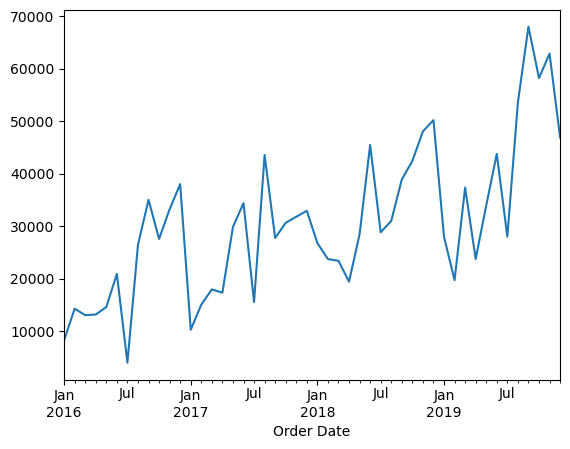

In [36]:
# Create a time plot of aggprofits
aggprofits.plot()


## Examine the patterns in the data

We've examined the overall patterns in the data through the time plot. To clearly identify if the company appears to exhibit increasing profits, it is helpful to decompose the time series into its individual elements. Then, we can isolate the exact trend of sales from other variation in the time series. This allows us to identify if there is growth within the company as opposed to just random fluctuations known as noise. 

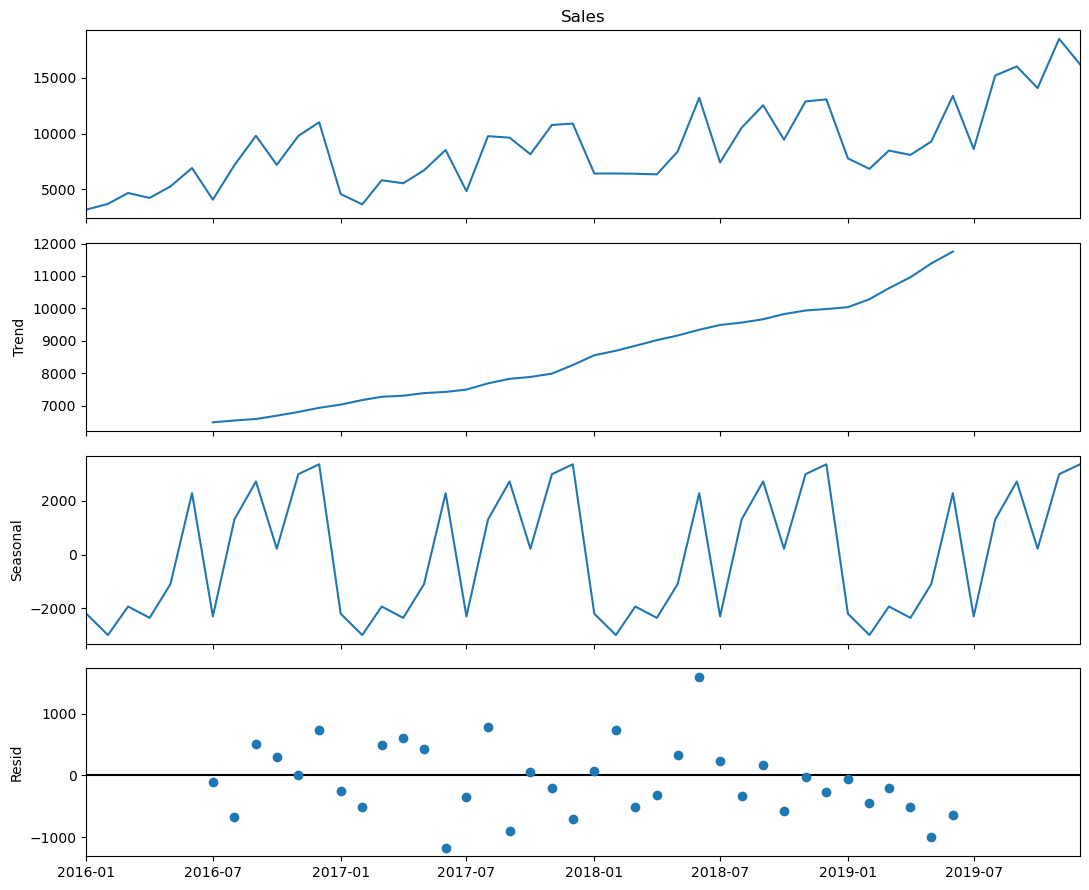

In [60]:
# Import the required package
import statsmodels.api as sm
from pylab import rcParams

# Examine the trend, seasonal variation and noise in sales
data = sales[['Order Date', 'Sales']]
data= data.groupby('Order Date').sum().reset_index()
data = data.set_index('Order Date')
aggdata = data['Sales'].resample('MS').mean()
rcParams['figure.figsize'] = 11,9
decomposition = sm.tsa.seasonal_decompose(aggdata)
fig = decomposition.plot()
plt.show()

We have isolated the individual components of the time series data. We can examine these and other patterns in the data further by plotting the Autocorrelation Functions and the Partial Autocorrelation Functions. 

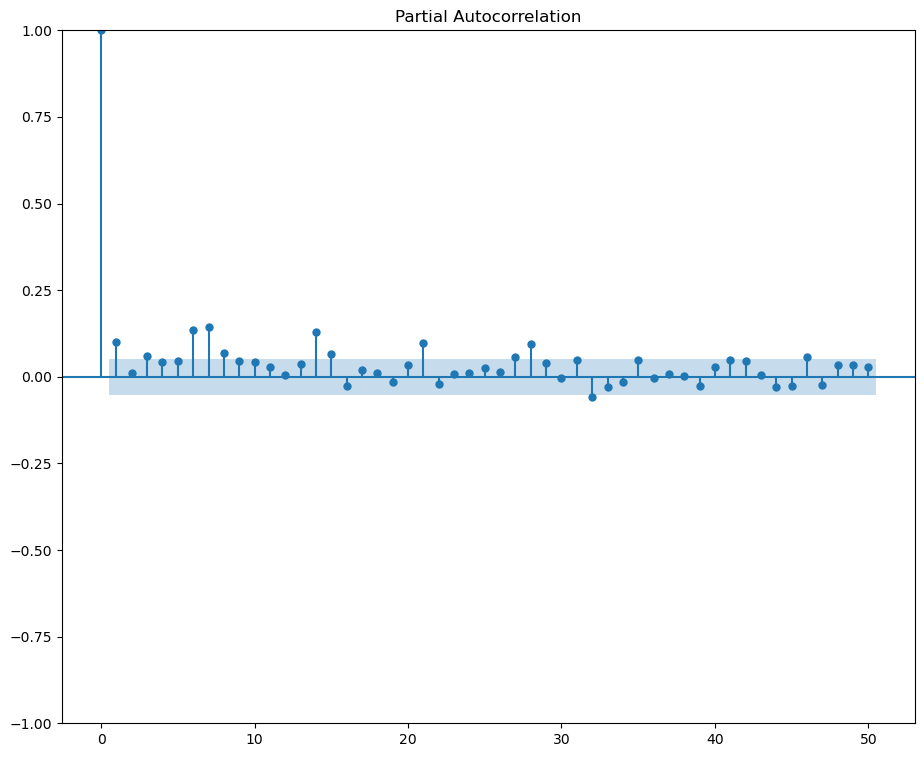

In [66]:
# Import the required package
from statsmodels.graphics.tsaplots import plot_pacf

# Visualise a PACF plot of profits
plot_pacf(profits,lags=50)
plt.show()

## Modelling the company's performance

Now we understand the patterns and trends in the profits of the company, we can fit a time series model. This can be used to produce a prediction for the company's future performance. Therefore, we should try to develop as accurate model as possible to deliver more trustworthy predictions.

Using the techniques we have learnt in this course, select an appropriate model to model the company's profits. This model can then be fitted to the data and its performance and fit can be measured. It is good practice to check your model's fit before generating predictions. The fit of the model should be assessed in terms of the coefficients. This informs us whether predictions based on these models can be trusted.

We practised creating and selecting ARIMA time series models in the time series analysis section in Module 1 of Unit 4: Decision Making. If you purchased the learning and certificate Analyst Pathway, we strongly recommend you revisit this content if you are struggling to complete these tasks.

The following is assessed in the assessment.

To prepare our data for modelling we first need to:
- Select only the Profit and Order Date columns
- Group by Order Date, sum and reset the index
- Set the index to be Order Date
- Resample Profit and then sum, specifying MS as our resampling method.

This final dataset will then be used to test which models provide the optimal Akaike information criterion (AIC) score.

In [229]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]      

MSE = []
ARIMA = []
ARIMA2 = []
AIC = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aggprofits,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
            y_forecasted = pred.predicted_mean
            y_truth = aggprofits['2019-01-01':]
            mse = ((y_forecasted - y_truth) ** 2).mean()
            MSE.append(np.sqrt(mse))
            ARIMA.append(param)
            ARIMA2.append(param_seasonal)
            AIC.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
x = MSE.index(min(MSE))
print(min(MSE), ARIMA[x], ARIMA2[x], AIC[x])

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16077D+01    |proj g|=  5.80336D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.803D-07   1.161D+01
  F =   11.607724185719695     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1116.3415218290907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     96      2     1     0   6.353D+04   1.542D+01
  F =   15.415963087131054     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1483.9324563645812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88045D+00    |proj g|=  2.71886D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56661D+01    |proj g|=  8.60057D-02

At iterate    5    f=  9.56625D+01    |proj g|=  4.47260D-02

At iterate   10    f=  2.57528D+01    |proj g|=  2.18748D-02
  ys=-2.184E+02  -gs= 9.437E-01 BFGS update SKIPPED
  ys=-1.190E+02  -gs= 1.056E+00 BFGS update SKIPPED
  ys=-6.758E+01  -gs= 7.215E-01 BFGS update SKIPPED
  ys=-4.358E+01  -gs= 7.173E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     96      4     4     0   1.454D+04   1.546D+01
  F =   15.461700291702352     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1490.3232280034258
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42208D+00    |proj g|=  1.78888D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


  ys=-2.357E+02  -gs= 8.383E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     29      2     1     0   9.516D+04   9.342D+01
  F =   93.419304386416556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:8974.253221095989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56214D+00    |proj g|=  2.62721D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38323D+01    |proj g|=  8.43799D-02
  ys=-2.204E+02  -gs= 3.185E-02 BFGS update SKIPPED

At iterate    5    f=  8.44367D+01    |proj g|=  1.45839D+02
  ys=-2.009E-11  -gs= 1.367E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     91      2     2     0   1.458D+02   8.444D+01
  F =   84.436746271473865     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:8113.927642061491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38138D+00    |proj g|=  1.53883D-01

At iterate    5    f=  5.34718D+00    |proj g|=  5.23216D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     85      3     3     0   1.213D+05   1.384D+01
  F =   13.839948646107826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1332.6350700263513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66954D+00    |proj g|=  2.93507D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


  ys=-6.332E-03  -gs= 3.417E-01 BFGS update SKIPPED

At iterate   25    f=  1.37502D+01    |proj g|=  1.23762D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26    124      3     4     0   1.238D+05   1.375D+01
  F =   13.750244199462605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1326.02344314841
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09730D+00    |proj g|=  2.95435D-06

           * * *

Tit   = t

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.86614D+00    |proj g|=  2.80687D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.190D-05   4.866D+00
  F =   4.8661418711158388     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:473.1496196271205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00717D+01    |proj g|=  7.60105D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.


  ys=-3.918E+02  -gs= 2.220E+02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     62      2     1     0   2.700D+05   4.421D+01
  F =   44.210038678314412     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:4250.163713118183
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36120D+00    |proj g|=  1.29847D-01

At iterate    5    f=  7.29794D+00    |proj g|=  1.59288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of f

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  4.63282D+00    |proj g|=  2.53617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     15      1     0     0   1.249D-05   4.632D+00
  F =   4.6319938942180583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:450.67141384493357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75127D+00    |proj g|=  3.82776D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.72734D+00    |proj g|=  5.33026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     21      1     0     0   2.391D-05   7.727D+00
  F =   7.7273323655506667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:747.823907092864
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62469D+01    |proj g|=  2.76804D+00

At iterate    5    f=  3.90639D+01    |proj g|=  7.40227D-01

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:3675.287548246042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07747D+00    |proj g|=  3.78820D-02

At iterate    5    f=  5.06563D+00    |proj g|=  8.48751D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   1.461D-05   5.066D+00
  F =   5.0656338985320977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:492.30085425908135
RUNNING THE L-BFGS-B CODE

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  7.91364D+00    |proj g|=  3.84276D-01

At iterate    5    f=  7.76530D+00    |proj g|=  1.17056D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   3.848D-05   7.761D+00
  F =   7.7614339607009564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:751.0976602272918
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41182D+01    |proj g|=  2.06906D+01
  ys=-1.918E+02  

 This problem is unconstrained.


  ys=-2.061E-01  -gs= 3.663E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9    104      2     3     0   1.901D+05   1.241D+01
  F =   12.407066731100279     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1199.0784061856268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14355D+00    |proj g|=  2.32089D-01

At iterate    5    f=  5.06246D+00    |proj g|=  5.84101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11177D+00    |proj g|=  1.59580D-01

At iterate    5    f=  5.05520D+00    |proj g|=  8.16586D-03

At iterate   10    f=  5.05512D+00    |proj g|=  8.16245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   8.162D-06   5.055D+00
  F =   5.0551164666325752     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:493.29118079672725
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02639D+01    |proj g|=  2.77440D-01

At iterate   10    f=  1.02637D+01    |proj g|=  9.40993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   9.410D-05   1.026D+01
  F =   10.263732594956902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:991.3183291158626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88759D+01    |proj g|=  2.18961D+01

At iterate    5 

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  4.84206D+00    |proj g|=  1.82653D-01

At iterate   15    f=  4.83833D+00    |proj g|=  1.78786D-02

At iterate   20    f=  4.83832D+00    |proj g|=  1.05256D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     34      1     0     0   1.053D-05   4.838D+00
  F =   4.8383169679288516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:472.4784289211698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.


At iterate   10    f=  7.75133D+00    |proj g|=  2.48817D-03
  ys=-4.024E-03  -gs= 6.209E-04 BFGS update SKIPPED

At iterate   15    f=  7.74617D+00    |proj g|=  2.52403D-01

At iterate   20    f=  7.74081D+00    |proj g|=  1.32064D-01

At iterate   25    f=  7.73914D+00    |proj g|=  7.50630D-01

At iterate   30    f=  7.70952D+00    |proj g|=  1.72585D+00

At iterate   35    f=  7.70522D+00    |proj g|=  2.97790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     57      1     1     0   2.978D-03   7.705D+00
  F =   7.7052233350241117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.06244D+00    |proj g|=  1.30455D-02

At iterate   10    f=  5.05994D+00    |proj g|=  6.05349D-02

At iterate   15    f=  5.05298D+00    |proj g|=  9.12419D-01

At iterate   20    f=  5.04489D+00    |proj g|=  1.44574D-01

At iterate   25    f=  5.04362D+00    |proj g|=  5.21192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     40      1     0     0   1.822D-05   5.044D+00
  F =   5.0436184058957716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:492.18736696599404
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  4.84122D+00    |proj g|=  2.79431D-02

At iterate   10    f=  4.83481D+00    |proj g|=  8.12208D-02

At iterate   15    f=  4.82651D+00    |proj g|=  6.89853D-02

At iterate   20    f=  4.82503D+00    |proj g|=  3.52721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     37      1     0     0   6.215D-04   4.825D+00
  F =   4.8250312992432471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:473.20300472735175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   8.921D-06   4.874D+00
  F =   4.8742340161098783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:473.9264655465483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54709D+00    |proj g|=  2.33310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate   15    f=  3.84611D+01    |proj g|=  1.31184D-02

At iterate   20    f=  3.84426D+01    |proj g|=  2.00138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.817D-04   3.844D+01
  F =   38.440996397242969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:3698.335654135325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87124D+00    |proj g|=  2.74953D-02

           * * *


 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     54      2     0     0   4.059D+03   4.361D+01
  F =   43.609774893594249     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:4194.538389785048
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33569D+00    |proj g|=  1.92229D-01

At iterate    5    f=  7.28548D+00    |proj g|=  4.83665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.792E+01  -gs= 2.751E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     71      2     1     0   4.484D+05   3.366D+01
  F =   33.662224749096232     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:3241.5735759132385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84521D+00    |proj g|=  6.96488D-02

At iterate    5    f=  4.83023D+00    |proj g|=  4.74642D-03

At iterate   10    f=  4.83017D+00    |proj g|=  1.63406D-05

           * * 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


##### <b>Please take a note of the optimal time series model for modelling the company's profits.</b>

<i>Select here to type your answer: (1, 1, 1) (1, 1, 0, 12)

In [370]:
# Create the selected model and call it mod1
mod1 = sm.tsa.statespace.SARIMAX(aggprofits,
                                order=(0,1,1),
                                seasonal_order = (0,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility=False)

In [372]:
# Fit the model and call it results1
results1 = mod1.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71314D+00    |proj g|=  2.18848D-01

At iterate    5    f=  4.63282D+00    |proj g|=  2.53617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     15      1     0     0   1.249D-05   4.632D+00
  F =   4.6319938942180583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


In [374]:
# Examine the fit of the model
results1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,-0.9201,0.163,-5.662,0.000,-1.239,-0.602
ma.S.L12,-0.4506,0.346,-1.302,0.193,-1.129,0.228
sigma2,1.254e+08,3.71e-10,3.38e+17,0.000,1.25e+08,1.25e+08


In addition to examining the appropriateness of the model and the goodness of fit, we can quantify its accuracy by contrasting predictions for the prior year with the actuals. This allows us to understand the degree of accuracy the model has before predicting unknowns.

The inclusion of confidence intervals in predictions against actuals allows a visual representation of the uncertainty in the model's estimations and are useful to determine the accuracy of the model.

We practised generating predictions from time series models in the time series analysis section in Module 1 of Unit 4: Decision Making. If you purchased the learning and certificate Analyst Pathway, we recommend you revisit this content if you are struggling to complete these tasks.


The following is assessed in the assessment.

By fitting our time series model, we can use the results of this to generate predictions from ‘2019-01-01’ by specifying this datetime as the start date in the get_prediction command.

In [376]:
# Generate predictions for the prior year and call it pred1
pred1 = results1.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)

# Generate confidence intervals and call it pred_ci1
pred_ci1 = pred1.conf_int()


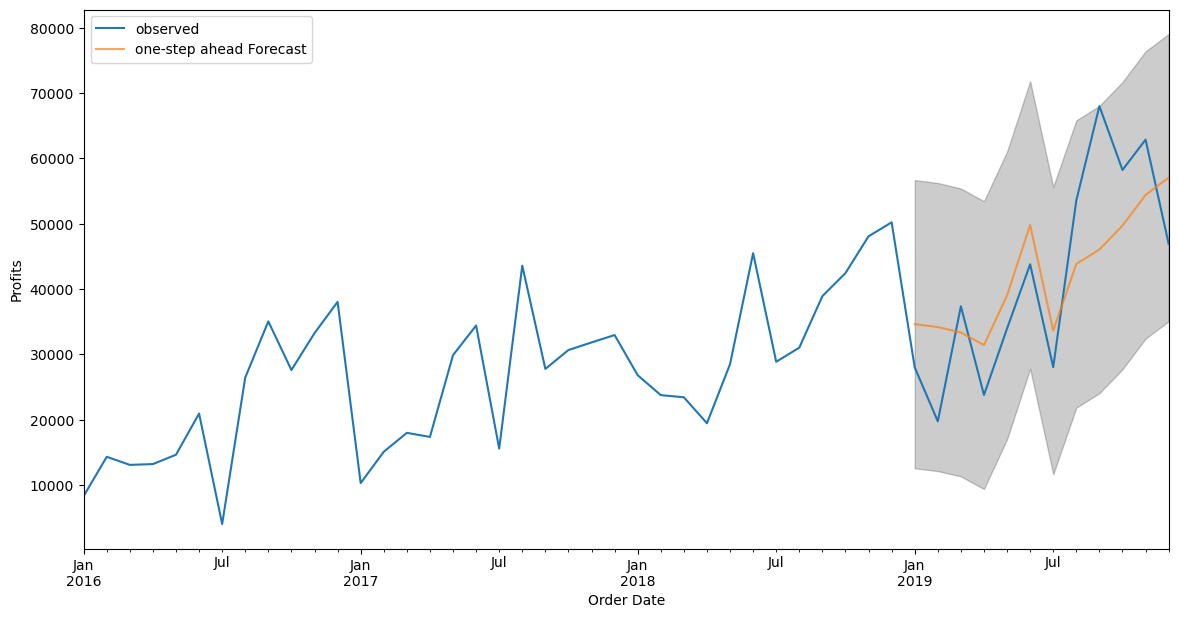

In [378]:
# Plot the actuals with the label Observed
ax = aggprofits['2016':].plot(label = 'observed')

# Plot the predictions with the label Forecast
pred1.predicted_mean.plot(ax=ax,label = 'one-step ahead Forecast', alpha = .7, figsize=(14,7))

# Plot the confidence intervals
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:,0],
                pred_ci1.iloc[:,1],
                color = 'k',
                alpha = .2)
ax.set_xlabel('Order Date')
ax.set_ylabel('Profits')
plt.legend()

##### <b>Please take a note of the key features in the graph above.</b>

<i>Select here to type your answer:

As well as producing a visual representation of the accuracy of the model, it is possible to quantify the model's accuracy, numerically, using the Mean Squared Error or the Root Mean Squared Error.

In [380]:
y_forecasted = pred1.predicted_mean
y_truth = aggprofits['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
np.sqrt(mse)

10173.741875639422

## Predicting the company's performance

Now we have checked whether our model is suitable and determined how accurate it is, we can generate predictions for the company's performance in the next few years. This will allow us to understand the likelihood of the company being a good investment in terms of profits and we can examine the likely return on investment.

We practised creating and selecting ARIMA time series models in the time series analysis section in Module 1 of Unit 4: Decision Making. We covered slicing data in Module 1 of Unit 3: Analysing the Data. If you purchased the learning and certificate Analyst Pathway, we strongly recommend you revisit this content if you are struggling to complete these tasks.

In [382]:
# Generate the predictions for 5 years' time and call it pred_uc1
pred_uc1 = results1.get_forecast(steps=50)

# Generate confidence intervals and call it pred_ci1
pred_ci1 = pred_uc1.conf_int()

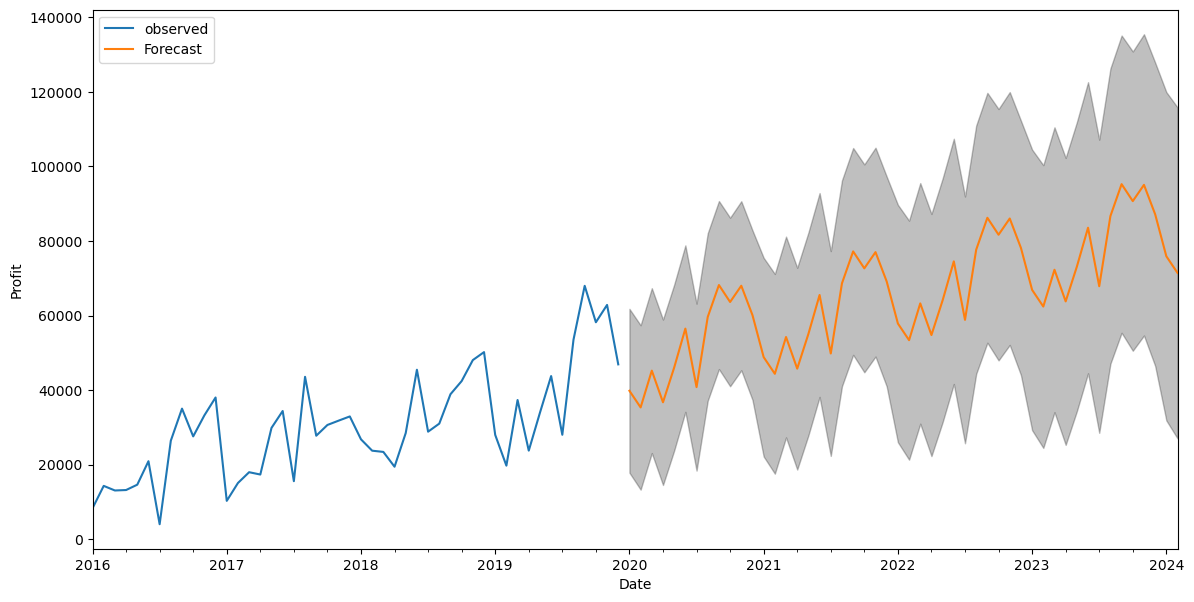

In [384]:
# Plot the actuals with the label Observed
ax = aggprofits.plot(label = 'observed', figsize = (14,7))

# Plot the predictions with the label Forecast
pred_uc1.predicted_mean.plot(ax=ax, label = 'Forecast')

# Plot the confidence intervals
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:,0],
                pred_ci1.iloc[:,1],
                color = 'k', 
                alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Profit')
plt.legend()

Now that we have generated and plotted our predictions, we can calculate the forecasted profits for next year by using the predicted mean of our predictions.

In [386]:
# Examine your predicted mean figures for your model
mean_forecast1 = pred_uc1.predicted_mean
print(mean_forecast1)


2020-01-01    39832.720814
2020-02-01    35364.572433
2020-03-01    45233.254159
2020-04-01    36746.784703
2020-05-01    46060.569456
2020-06-01    56505.437782
2020-07-01    40808.328720
2020-08-01    59627.915260
2020-09-01    68193.022918
2020-10-01    63647.976182
2020-11-01    68000.093249
2020-12-01    60119.341582
2021-01-01    48852.077217
2021-02-01    44383.928836
2021-03-01    54252.610562
2021-04-01    45766.141106
2021-05-01    55079.925859
2021-06-01    65524.794185
2021-07-01    49827.685123
2021-08-01    68647.271663
2021-09-01    77212.379321
2021-10-01    72667.332585
2021-11-01    77019.449652
2021-12-01    69138.697985
2022-01-01    57871.433620
2022-02-01    53403.285239
2022-03-01    63271.966965
2022-04-01    54785.497509
2022-05-01    64099.282262
2022-06-01    74544.150588
2022-07-01    58847.041526
2022-08-01    77666.628066
2022-09-01    86231.735724
2022-10-01    81686.688988
2022-11-01    86038.806055
2022-12-01    78158.054388
2023-01-01    66890.790023
2

The following is assessed in the assessment.

To predict profit for the next 5 years, we can use the get forecast command and specify 50 steps. We can then use the predicted mean command from this forecast to obtain the predicted profit values for each month. For the next year we can sum the first 12 estimates.

In [388]:
# Sum the first 12 estimates to produce a total expected value for 2020
sumforecast = mean_forecast1[0:12].sum()
print(sumforecast)

620140.0172576255


##### <b>Please take a note of the estimated total profits of the company for next year.</b>

<i>Select here to type your answer: 607878.0436965275

## Deeper further analysis

Now we have a visual representation of the company's estimated performance in terms of profits, we may want to investigate further. In addition to predicting the overall performance of the company, we may want to consider future sales growth.

In [288]:
# Select sales and order date from the sales data and call this dataset salesonly 
sales = pd.read_excel('Sales 2.xlsx')
salesonly = sales[['Order Date','Sales']]

In [290]:
# Aggregate the data by order date and sum to get sales value
salesonly = salesonly.groupby('Order Date').sum()

# Reset the index 
salesonly = salesonly.reset_index()

# Set the index as Order Date 
salesonly = salesonly.set_index('Order Date')

In [333]:
# Resample the sales specifying MS and summing to get total monthly sales figures and call this aggsales
aggsales = salesonly['Sales'].resample('MS').sum()

The optimal ARIMA model for modelling the total sales has order (1,1,0) and seasonal order (1,1,0,12). Using this model we can estimate the total sales for the next 5 years.

We practised forecasting predictions from time series models in the time series analysis section in Module 1 of Unit 4: Decision Making. We covered slicing data in Module 1 of Unit 3: Analysing the Data. If you purchased the learning and certificate Analyst Pathway, we strongly recommend you revisit this content if you are struggling to complete these tasks.

In [335]:
# Create the selected model and call it mod2

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]      

MSE = []
ARIMA = []
ARIMA2 = []
AIC = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aggsales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
            y_forecasted = pred.predicted_mean
            y_truth = aggsales['2019-01-01':]
            mse = ((y_forecasted - y_truth) ** 2).mean()
            MSE.append(np.sqrt(mse))
            ARIMA.append(param)
            ARIMA2.append(param_seasonal)
            AIC.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
x = MSE.index(min(MSE))
print(min(MSE), ARIMA[x], ARIMA2[x], AIC[x])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37012D+01    |proj g|=  6.48369D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.484D-08   1.370D+01
  F =   13.701231037452878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1317.3181795954763
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.509D-04   8.995D+00
  F =   8.9951334792813427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:867.5328140110089
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07434D+03    |proj g|=  4.15956D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31621D+01    |proj g|=  2.42297D-01

At iterate    5    f=  1.31150D+01    |proj g|=  1.11369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   2.111D-06   1.311D+01
  F =   13.114964257113494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1263.0365686828954
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.66096D+00    |proj g|=  2.61870D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.619D-06   5.661D+00
  F =   5.6609611715432822     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:549.4522724681551
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01384D+01    |proj g|=  6.21201D-03

At iterate    5    f=  1.01376D+01    |proj g|=  1.14059D-04

           * * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.36015D+03    |proj g|=  2.03493D+03
  ys=-1.419E+02  -gs= 5.246E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     95      2     2     0   3.368D+03   4.360D+03
  F =   4359.8691667536887     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:418555.4400083541
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23539D+00    |proj g|=  1.77462D-01

At iterate    5    f=  6.16760D+00    |proj g|=  6.85900D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.59558D+00    |proj g|=  9.83418D-02

At iterate   15    f=  5.59334D+00    |proj g|=  1.45515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   1.752D-05   5.593D+00
  F =   5.5933416644822707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:544.960799790298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22802D+01    |proj g|=  4.78373D-07

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:537.1328773483764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84645D+00    |proj g|=  1.17327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.168D-05   8.846D+00
  F =   8.8464506947322707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:853.259266694298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.25925D+00    |proj g|=  8.54676D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   8.547D-06   8.259D+00
  F =   8.2592478679366241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:796.8877953219159
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31024D+00    |proj g|=  2.40612D-01

At iterate    5    f=  5.27574D+00    |proj g|=  1.33194D-05

           * * *

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     52      2     1     0   5.003D+07   4.805D+02
  F =   480.52081983370499     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:46137.99870403568
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75206D+00    |proj g|=  1.70749D-01

At iterate    5    f=  5.72196D+00    |proj g|=  5.97957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   3.490D-06   5.217D+00
  F =   5.2166315022825600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:508.79662421912576
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25349D+01    |proj g|=  4.97252D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35060D+03    |proj g|=  1.27256D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      7      1     0     0   7.753D-06   4.188D+02
  F =   418.80080665842553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:40212.87743920885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0   

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.154E+06  -gs= 1.039E-01 BFGS update SKIPPED

At iterate   10    f=  7.31029D+02    |proj g|=  1.06662D+06
  ys=-6.474E+02  -gs= 8.401E+01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     75      2     2     0   1.067D+06   7.310D+02
  F =   731.02883277258627     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:70186.76794616829
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51619D+00  

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  8.51432D+00    |proj g|=  8.15291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.467D-06   8.514D+00
  F =   8.5143197718493244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:823.3746980975351
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55661D+00    |proj g|=  2.46190D-01

At iterate    5    f=  5.52173D+00    |proj g|=  3.11473D-03

           * * *


 This problem is unconstrained.



At iterate    5    f=  3.95382D+02    |proj g|=  1.09983D+06
  ys=-1.648E+04  -gs= 1.524E+03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     69      2     1     0   1.100D+06   3.954D+02
  F =   395.38160637477273     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:37966.634211978184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30361D+00    |proj g|=  8.76240D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  5.74367D+00    |proj g|=  1.02672D-01

At iterate   10    f=  5.71954D+00    |proj g|=  1.16991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.697D-05   5.720D+00
  F =   5.7195408557760139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:557.0759221544973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55661D+00    |proj g|=  2.46190D-01

At iterate    5 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22209D+01    |proj g|=  5.37703D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.377D-06   1.222D+01
  F =   12.220916463404537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1177.2079804868356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.94969D+02    |proj g|=  8.31197D+00

At iterate   20    f=  3.90191D+02    |proj g|=  6.61122D-01

At iterate   25    f=  3.89580D+02    |proj g|=  5.52378D-02

At iterate   30    f=  3.89498D+02    |proj g|=  3.36027D+00

At iterate   35    f=  3.89487D+02    |proj g|=  4.66639D-01

At iterate   40    f=  3.89483D+02    |proj g|=  1.27577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     71      1     0     0   2.928D-02   3.895D+02
  F =   389.48221807721546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:37398.2929354126

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   3.253D-06   5.466D+00
  F =   5.4655779519941339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:530.6954833914368
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58922D+00    |proj g|=  3.15953D-01

At iterate    5    f=  5.46238D+00    |proj g|=  2.31363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.62012D+02    |proj g|=  3.25528D+01

At iterate   10    f=  4.26706D+02    |proj g|=  1.91617D+01

At iterate   15    f=  3.83562D+02    |proj g|=  1.18573D+01

At iterate   20    f=  3.77921D+02    |proj g|=  9.46615D+04
  ys=-9.316E+02  -gs= 2.165E+00 BFGS update SKIPPED
  ys=-7.956E+00  -gs= 1.370E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     94      2     2     0   1.930D+05   3.769D+02
  F =   376.94017181321561     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:36196.2564940687
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47649D+00    |proj g|=  1.07381D-01

At iterate    5    f=  5.46623D+00    |proj g|=  7.23083D-03

At iterate   10    f=  5.46255D+00    |proj g|=  1.23650D-02

           * * *


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.21276D+00    |proj g|=  2.86645D-02

At iterate   10    f=  5.21109D+00    |proj g|=  7.34547D-03

At iterate   15    f=  5.21101D+00    |proj g|=  2.69427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     32      1     0     0   8.173D-03   5.210D+00
  F =   5.2100738301136102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:510.16708769090656
32055.709220405024 (1, 1, 0) (1, 1, 0, 12) 530.6954833914368


In [337]:
# Fit the model and call it results2
mod2 = sm.tsa.statespace.SARIMAX(aggsales,
                                order=(1,1,0),
                                seasonal_order = (1,1,0,12),
                                enforce_stationarity = False,
                                enforce_invertibility=False)

results2 = mod2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46788D+00    |proj g|=  4.31388D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   3.253D-06   5.466D+00
  F =   5.4655779519941339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [339]:
# Generate the predictions for 5 years' time and call it pred_uc2
pred_uc2 = results2.get_forecast(steps=50)

# Generate confidence intervals and call it pred_ci2
pred_ci2 = pred_uc2.conf_int()

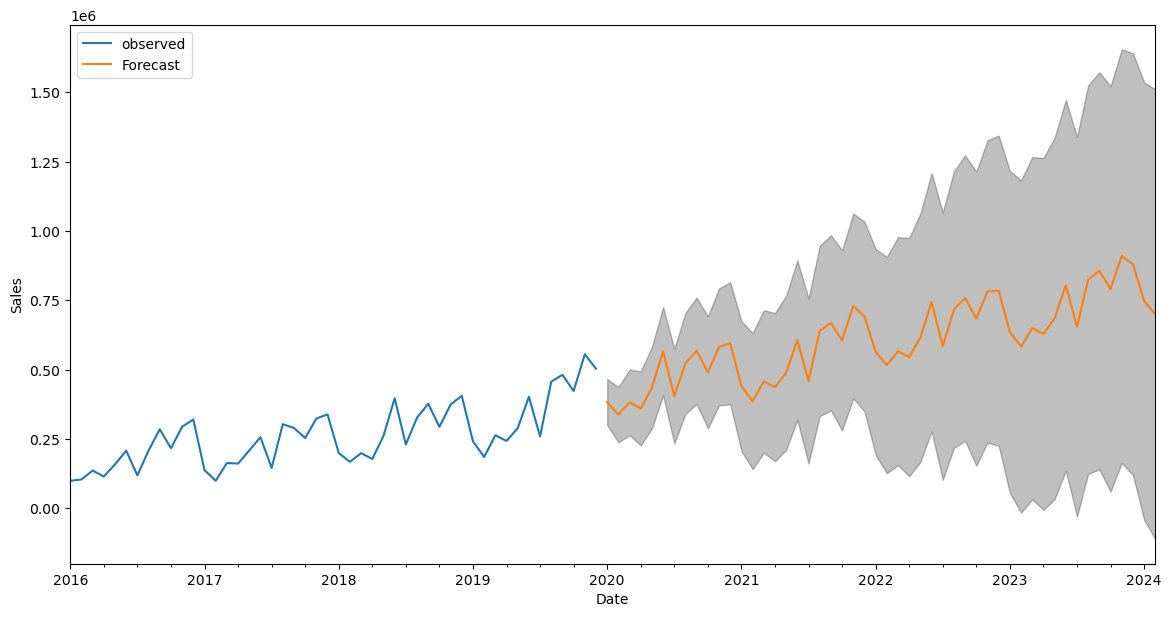

In [341]:
# Plot the actuals with the label Observed
ax = aggsales.plot(label = 'observed', figsize = (14,7))


# Plot the predictions with the label Forecast
pred_uc2.predicted_mean.plot(ax=ax, label = 'Forecast')

# Plot the confidence intervals
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:,0],
                pred_ci2.iloc[:,1],
                color = 'k', 
                alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

As well as identifying if the predicted sales of the company next years are likely to be promising, we should also consider if the model suggests there is a promising growth in sales. The total sales for the previous year are £4299865.87. If we consider the estimated total sales for the next year we can examine the growth rate.

In [343]:
# Sum the first 12 estimates to produce a total expected value for 2020 and save this as sales2020
mean_forecast2 = pred_uc2.predicted_mean
print(mean_forecast2)
sales2020 = mean_forecast2[0:12].sum()
print(sales2020)

2020-01-01    382982.003437
2020-02-01    337304.987129
2020-03-01    381748.622130
2020-04-01    360067.602814
2020-05-01    435050.791719
2020-06-01    566044.925569
2020-07-01    404592.443593
2020-08-01    523136.592045
2020-09-01    567717.088577
2020-10-01    489890.303366
2020-11-01    581744.767493
2020-12-01    595064.415917
2021-01-01    440433.948838
2021-02-01    386336.882585
2021-03-01    457259.841975
2021-04-01    436637.457411
2021-05-01    488637.827753
2021-06-01    605866.764645
2021-07-01    458776.859175
2021-08-01    639464.113920
2021-09-01    668351.721087
2021-10-01    605742.553291
2021-11-01    729430.288017
2021-12-01    691501.730694
2022-01-01    563858.712467
2022-02-01    516354.153602
2022-03-01    566545.033874
2022-04-01    545093.787549
2022-05-01    615088.635612
2022-06-01    743095.081334
2022-07-01    584759.946640
2022-08-01    716792.040197
2022-09-01    757966.449668
2022-10-01    683442.595394
2022-11-01    782206.360198
2022-12-01    784402

The following is assessed in the assessment.

To estimate the growth rate for sales for the next year, we first need to create a time series model to predict the sales value. We will use the get forecast command to generate the predictions and sum the first 12 entries of predicted mean to get a total sales value estimate for next year. We can then use this value to estimate the sales growth.

In [345]:
# Divide sales2020 by 4299865.87 and then minus 1 to examine the growth rate
g = (sales2020/4299865.87) - 1
print(g)

0.3082604699456317


##### <b>Please take a note of the predicted growth rate for the company's sales for next year.</b>

<i>Select here to type your answer: 0.3082604699456317

##### Assessment guidance

You are ready to take the assessment.

Remember, you should have fully completed your task and recorded your answers in Jupyter Notebook before moving on to the assessment. You can keep your Jupyter Notebook open in a separate browser window to refer to as you take the assessment.  

You will receive a score following completion of the assessment. If you have scored below the target mark of 60% for the section, you are recommended to refresh your knowledge in the course content (if purchased) and rework your Jupyter Notebook before re-attempting the assessment. You have a maximum of three assessment attempts.

You should aim to achieve a target score of 60% in each section of the case study. To pass the case study and be awarded the ICAEW Certificate, you are required to achieve a pass mark of 60% overall, averaged over all five sections, so do not be disheartened if you score below 60% in any one section, as a higher score in one or more of the other sections will contribute to the overall pass mark of 60%.

IMPORTANT: When submitting to the assessment portal, please do not navigate away from it until you have submitted all of your answers for that task. In between any of your 3 assessment attempts (but not during an attempt) you may navigate back to the course content, if you have purchased it, to refresh your knowledge and revisit your Jupyter Notebook to rework your analysis.